### Yolo v3 다운로드 및 설치

CDS 폴더명 수정 : CDS2(2022-2) → CDS2


In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 10029, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10029 (delta 3), reused 9 (delta 3), pack-reused 10017
Receiving objects: 100% (10029/10029), 9.36 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (6762/6762), done.
     |████████████████████████████████| 1.8 MB 24.2 MB/s 
     |████████████████████████████████| 157 kB 71.9 MB/s 
     |████████████████████████████████| 181 kB 51.2 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 157 kB 61.2 MB/s 
     |████████████████████████████████| 157 kB 11.1 MB/s 
     |████████████████████████████████| 157 kB 53.6 MB/s 
     |████████████████████████████████| 157 kB 60.6 MB/s 
     |████████████████████████████████| 156 kB 22.6 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CVAT : annotation file 실습
<br> 실습 링크 : https://cvat.org/

In [3]:
cd /content/drive/MyDrive/CDS2

/content/drive/MyDrive/CDS2


In [4]:
cp SEM.zip /content

In [5]:
cd /content

/content


### Dataset 올리기 & yaml 파일 올리기

In [6]:
# Google Drive 밑에 Directory 생성.
!mkdir "/content/ultra_workdir"

* annotation 데이터를 포함한 이미지 데이터를 올려준다.

In [7]:
!unzip -qq /content/SEM.zip

→ 폴더에서 데이터 확인

* yaml 파일을 올려준다.

In [8]:
cd /content/drive/MyDrive/CDS2

/content/drive/MyDrive/CDS2


In [9]:
cp sem.yaml /content/SEM

In [10]:
cd /content

/content


In [11]:
from IPython.display import Image

* yaml 확인

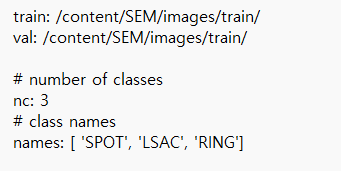

In [12]:
Image('/content/drive/MyDrive/CDS2/img/04/yaml.png')

In [13]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
#  batch size는 8로 정할것. 16으로 설정시 성능이 좋아지지 않음. 시간 관계상 1번만 돌려봄.    
!cd /content/yolov3; python train.py --img 640 --batch 8 --epochs 10 --data /content/SEM/sem.yaml --weights yolov3.pt \
                                     --project=/content/ultra_workdir --name sem --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov3.pt, cfg=, data=/content/SEM/sem.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=/content/ultra_workdir, name=sem, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_

### 미리 200 epochs로 학습한 가중치로 실험

In [16]:
import matplotlib.pyplot as plt
import cv2

* 이미지

In [17]:
img1 = cv2.imread('/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/01_SPOT/248.jpg')

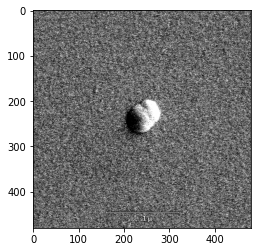

In [18]:
plt.imshow(img1)
plt.show()

In [19]:
# image 파일 inference  -학습에 사용하지 않은 이미지- 사전에 학습해둔 가중치 --출력 경로
!cd /content/yolov3;python detect.py --source /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/01_SPOT/248.jpg \
                            --weights /content/drive/MyDrive/CDS2/weight/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2
                            

detect: weights=['/content/drive/MyDrive/CDS2/weight/weights/best.pt'], source=/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/01_SPOT/248.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61508200 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/01_SPOT/248.jpg: 640x640 1 SPOT, Done. (0.058s)
Speed: 0.6ms pre-process, 57.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


* 객체 감지

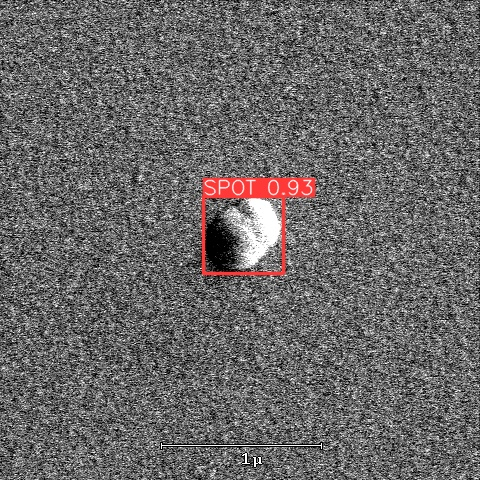

In [20]:
Image(filename='/content/data/output/run_image/248.jpg', width=400)

* 이미지

In [21]:
img2 = cv2.imread('/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/20_LSAC/5.jpg')

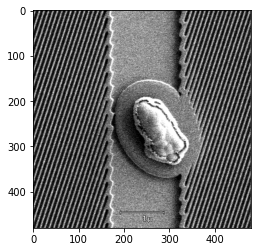

In [22]:
plt.imshow(img2)
plt.show()

In [23]:
# image 파일 inference  --학습에 사용하지 않은 이미 --사전에 학습해둔 가중치 --출력 경로
!cd /content/yolov3;python detect.py --source /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/20_LSAC/5.jpg \
                            --weights /content/drive/MyDrive/CDS2/weight/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2
                            

detect: weights=['/content/drive/MyDrive/CDS2/weight/weights/best.pt'], source=/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/20_LSAC/5.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61508200 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/20_LSAC/5.jpg: 640x640 1 LSAC, Done. (0.064s)
Speed: 0.5ms pre-process, 63.6ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


* 객체 감지

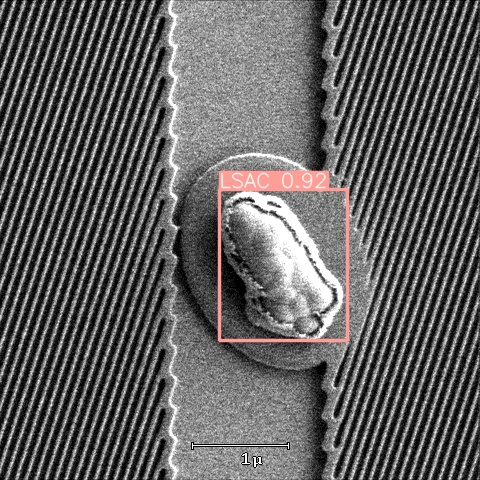

In [24]:
Image(filename='/content/data/output/run_image/5.jpg', width=400)

* 이미지

In [25]:
img3 = cv2.imread('/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/50.jpg')

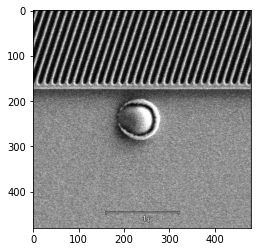

In [26]:
plt.imshow(img3)
plt.show()

In [27]:
!cd /content/yolov3;python detect.py --source /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/50.jpg \
                            --weights /content/drive/MyDrive/CDS2/weight/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/content/drive/MyDrive/CDS2/weight/weights/best.pt'], source=/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/50.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61508200 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TRAIN/23_RING/50.jpg: 640x640 1 RING, Done. (0.065s)
Speed: 0.5ms pre-process, 64.9ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


* 객체 감지

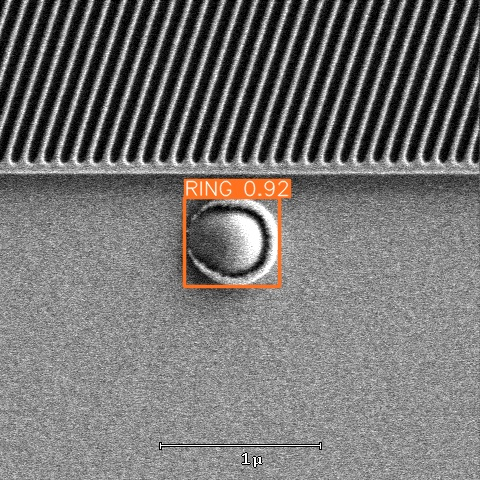

In [28]:
Image(filename='/content/data/output/run_image/50.jpg', width=400)

* 이미지

In [29]:
img4 = cv2.imread('/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TEST/20_LSAC/8.jpg')

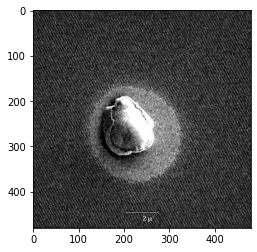

In [30]:
plt.imshow(img4)
plt.show()

In [31]:
!cd /content/yolov3;python detect.py --source /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TEST/20_LSAC/8.jpg \
                            --weights /content/drive/MyDrive/CDS2/weight/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 2

detect: weights=['/content/drive/MyDrive/CDS2/weight/weights/best.pt'], source=/content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TEST/20_LSAC/8.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 261 layers, 61508200 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/CDS2/SEM_Dataset/IPTCL_CELL_TEST/20_LSAC/8.jpg: 640x640 1 LSAC, Done. (0.065s)
Speed: 0.6ms pre-process, 64.9ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


* 객체 감지

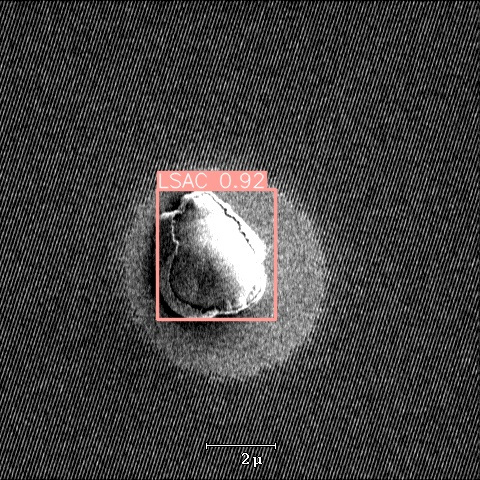

In [32]:
Image(filename='/content/data/output/run_image/8.jpg', width=400)

CDS 폴더명 수정 : CDS2 → CDS2(2022-2)